In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [807]:
df=pd.read_csv('/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/Final preprocessed data.csv')

In [808]:
def calculate_pefr(row):
    height_m = row['Height'] / 100  # Convert height to meters
    if row['Age'] <= 18:  # Children
        return ((row['Height'] - 100) * 5) + 100
    elif row['Sex'] == 'M':  # Adult Men
        return (((height_m * 5.48) + 1.58) - (row['Age'] * 0.041)) * 60
    elif row['Sex'] == 'F':  # Adult Women
        return (((height_m * 3.72) + 2.24) - (row['Age'] * 0.03)) * 60
    else:
        return None  # Handle unexpected cases

# Apply the function to each row
df['Normal PEFR'] = df.apply(calculate_pefr, axis=1)


In [809]:
df['Difference (%)'] = abs((df['Normal PEFR'] - df['Average C.PEFR']) / df['Normal PEFR'])


In [810]:
# Define fixed thresholds
low_threshold = 0.2 # Below 20% is Low
high_threshold = 0.5  # Above 50% is High

In [811]:
# Define clusters for 'Difference (%)' values
def cluster_difference(value):
    if value > high_threshold:
        return 'High'
    elif value < low_threshold:
        return 'Low'
    else:
        return 'Moderate'

# Apply clustering to the 'Difference (%)' column
df['Severity'] = df['Difference (%)'].apply(cluster_difference)


In [812]:
# Print the thresholds
print(f"Low Threshold (Below 20%): {low_threshold}")
print(f"High Threshold (Above 50%): {high_threshold}")
print(f"Moderate Threshold (Between 20% and 50%): {low_threshold} to {high_threshold}")

Low Threshold (Below 20%): 0.2
High Threshold (Above 50%): 0.5
Moderate Threshold (Between 20% and 50%): 0.2 to 0.5


In [813]:
df

,Unnamed: 0,ID,BCODE,UID1,Age,Sex,Smoke,Smoke_amount,Height,Weight,...,altitude,Altitude_Category,Average C.PEFR,Standard Deviation PEFR,mean_temperature,mean_humidity,AQI,Normal PEFR,Difference (%),Severity
0,0,SB-001,14631875,BC4386476,43,M,NS,0,156,76,...,749.0,Low Altitude,350.83,37.07,11.35,73.50,No data,501.948,0.301063,Moderate
1,1,SB-002,14010074,BC3298156,66,M,NS,0,163,58,...,15.0,Low Altitude,501.31,72.37,11.16,68.82,0.002,468.384,0.070297,Low
2,2,SB-003,14221420,BC4165314,61,M,ES,20,173,67,...,10.0,Low Altitude,467.17,20.37,11.28,72.08,0.29,513.564,0.090337,Low
3,3,SB-004,14010592,BC4201070,49,M,NS,0,142,51,...,38.0,Low Altitude,320.15,24.40,10.92,72.40,0.0049,441.156,0.274293,Moderate
4,4,SB-005,14010759,BC4212692,53,M,NS,0,156,70,...,15.0,Low Altitude,320.15,9.08,11.16,68.82,0.002,477.348,0.329315,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,SB-135,14000819,BC3296833,79,M,NS,0,163,67,...,21.0,Low Altitude,258.81,19.83,11.16,68.82,0.34,436.404,0.406949,Moderate
110,110,SB-137,14000774,BC3300701,76,F,NS,0,160,66,...,15.0,Low Altitude,258.81,19.83,11.16,68.82,No data,354.720,0.270382,Moderate
111,111,SB-139,14000670,BC3334855,50,F,ES,20,162,64,...,8.0,Low Altitude,258.81,19.83,11.16,68.82,No data,405.984,0.362512,Moderate
112,112,SB-140,14000334,BC3309595,69,F,ES,15,170,72,...,15.0,Low Altitude,258.81,19.83,11.16,68.82,0.002,389.640,0.335771,Moderate


In [814]:
df['Asthma']='yes'

In [815]:
df.columns

Index(['Unnamed: 0', 'ID', 'BCODE', 'UID1', 'Age', 'Sex', 'Smoke',
       'Smoke_amount', 'Height', 'Weight', 'BMI', 'BSA', 'occupation',
       'occupation_english', 'address', 'address_english', 'Age_group',
       'BMI_category', 'Smoking_intensity', 'latitude', 'longitude',
       'altitude', 'Altitude_Category', 'Average C.PEFR',
       'Standard Deviation PEFR', 'mean_temperature', 'mean_humidity', 'AQI',
       'Normal PEFR', 'Difference (%)', 'Severity', 'Asthma'],
      dtype='object')

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               114 non-null    int64  
 1   ID                       114 non-null    object 
 2   BCODE                    114 non-null    object 
 3   UID1                     114 non-null    object 
 4   Age                      114 non-null    int64  
 5   Sex                      114 non-null    object 
 6   Smoke                    114 non-null    object 
 7   Smoke_amount             114 non-null    int64  
 8   Height                   114 non-null    int64  
 9   Weight                   114 non-null    int64  
 10  BMI                      114 non-null    float64
 11  BSA                      114 non-null    float64
 12  occupation               114 non-null    object 
 13  occupation_english       114 non-null    object 
 14  address                  1

In [817]:
# Select relevant features for clustering
features = ['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
            'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature', 'Severity']

# Ensure 'ID' is included in the selected columns
df = df[features + ['ID']].copy()


In [818]:
# Replace 'No data' with NaN and handle missing values
df.replace('No data', np.nan, inplace=True)
df['Average C.PEFR'] = pd.to_numeric(df['Average C.PEFR'], errors='coerce')  # Ensure numeric
df.dropna(inplace=True)  # Drop rows with missing values

In [819]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID'],
      dtype='object')

In [820]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Encode 'Sex' (e.g., M/F)

In [821]:
Severity_encoding = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Severity_Encoded'] = df['Severity'].map(Severity_encoding)

In [822]:
# Select only numerical columns for standardization and clustering
numeric_features = ['Age', 'BMI', 'Smoke_amount', 'Average C.PEFR', 'AQI', 'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature', 'Severity_Encoded']
df_numeric = df[numeric_features]

In [823]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [824]:
# Exclude columns that shouldn't be normalized
columns_to_normalize = ['Age', 'BMI', 'Smoke_amount', 'Average C.PEFR', 'AQI',
                        'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature','Severity_Encoded']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Verify the normalized data
print("Normalized Data:")
print(df[columns_to_normalize].head())

Normalized Data:
        Age       BMI  Smoke_amount  Average C.PEFR           AQI  \
1  0.600000  0.310917      0.000000        0.737290  2.000200e-07   
2  0.516667  0.345766      0.333333        0.671521  2.900290e-05   
3  0.316667  0.527810      0.000000        0.388295  4.900490e-07   
4  0.383333  0.745250      0.000000        0.388295  2.000200e-07   
5  0.566667  0.637367      0.283333        0.626134  5.400540e-07   

   Standard Deviation PEFR  mean_humidity  mean_temperature  Severity_Encoded  
1                 0.232149       0.542688          0.633333               0.0  
2                 0.065343       0.818259          0.651515               0.0  
3                 0.078270       0.845309          0.596970               0.5  
4                 0.029127       0.542688          0.633333               0.5  
5                 0.119394       0.000000          0.683333               0.0  


In [825]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded'],
      dtype='object')

In [826]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

In [827]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

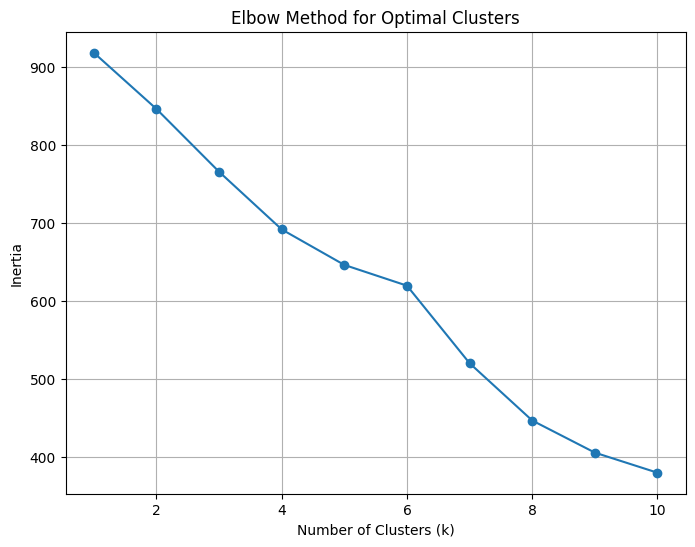

In [828]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [829]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded'],
      dtype='object')

In [830]:
# Silhouette Analysis
silhouette_scores = []

In [831]:
for k in range(2, 11):  # Silhouette Score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [832]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded'],
      dtype='object')

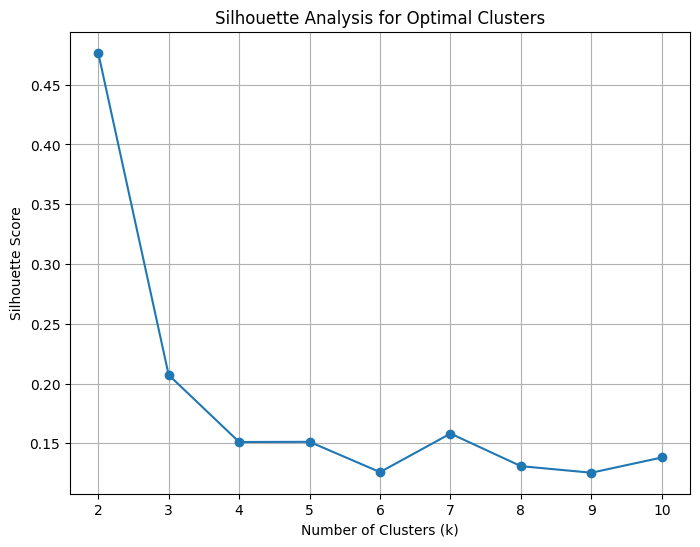

In [833]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [834]:
# Print Optimal Number of Clusters
optimal_k_elbow = cluster_range[inertia.index(min(inertia))]
optimal_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to Elbow Method: {optimal_k_elbow}")
print(f"Optimal number of clusters according to Silhouette Analysis: {optimal_k_silhouette}")

Optimal number of clusters according to Elbow Method: 10
Optimal number of clusters according to Silhouette Analysis: 2


In [835]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

In [836]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [837]:
# Calculate silhouette scores for both models
gmm_silhouette = silhouette_score(df_scaled, gmm_labels) if len(set(gmm_labels)) > 1 else None
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else None


In [838]:
# Add cluster labels to DataFrame for visualization
df['GMM_Cluster'] = gmm_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [839]:
# Print silhouette scores
gmm_silhouette, dbscan_silhouette

(0.20722236126826854, 0.061758383794472266)

In [840]:
# Parameters for k-fold cross-validation
n_splits = 5  # Number of folds
k_values = range(2, 11)  # Range of clusters to evaluate
results = []  # To store results

In [841]:
# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


In [842]:
# Perform k-fold cross-validation for each k in k_values
for k in k_values:
    silhouette_scores = []  # To store silhouette scores for each fold

    for train_index, test_index in kf.split(df_scaled):
        # Split the data into training and testing
        train_data, test_data = df_scaled[train_index], df_scaled[test_index]

        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(train_data)

        # Predict cluster labels for the test data
        cluster_labels = kmeans.predict(test_data)

        # Check if the silhouette score can be computed
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(test_data, cluster_labels)
            silhouette_scores.append(silhouette_avg)
        else:
            # If only one cluster, append a placeholder value (e.g., 0 or NaN)
            silhouette_scores.append(0)

    # Store the results for this k
    results.append({
        'k': k,
        'Silhouette_Score_Mean': np.mean(silhouette_scores),
        'Silhouette_Score_Std': np.std(silhouette_scores)
    })


In [843]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

In [844]:
results_df

,k,Silhouette_Score_Mean,Silhouette_Score_Std
0,2,0.172821,0.191982
1,3,0.108133,0.056034
2,4,0.087930,0.033843
3,5,0.051223,0.087069
4,6,0.020513,0.100100
5,7,0.056334,0.054021
6,8,0.053926,0.085768
7,9,0.094095,0.067645
8,10,0.088236,0.036695


In [845]:
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


In [846]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster'],
      dtype='object')

In [847]:
# Perform EDA on each cluster
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())  # Summary statistics
    print("\n")
    print(f"Cluster {cluster} Feature Distributions:")


Cluster 0:
            Age       BMI  Sex  Smoke_amount  Average C.PEFR           AQI  \
count  1.000000  1.000000  1.0      1.000000        1.000000  1.000000e+00   
mean   0.583333  0.098736  0.0      0.333333        0.954497  2.000200e-07   
std         NaN       NaN  NaN           NaN             NaN           NaN   
min    0.583333  0.098736  0.0      0.333333        0.954497  2.000200e-07   
25%    0.583333  0.098736  0.0      0.333333        0.954497  2.000200e-07   
50%    0.583333  0.098736  0.0      0.333333        0.954497  2.000200e-07   
75%    0.583333  0.098736  0.0      0.333333        0.954497  2.000200e-07   
max    0.583333  0.098736  0.0      0.333333        0.954497  2.000200e-07   

       Standard Deviation PEFR  mean_humidity  mean_temperature  \
count                 1.000000       1.000000           1.00000   
mean                  0.030025       0.994928           0.69697   
std                        NaN            NaN               NaN   
min               

In [848]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster'],
      dtype='object')

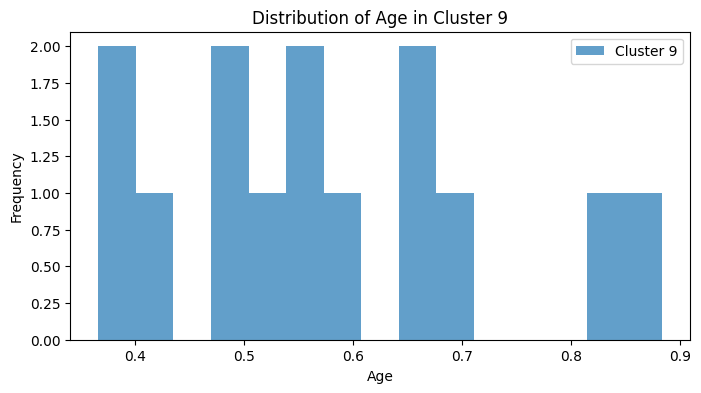

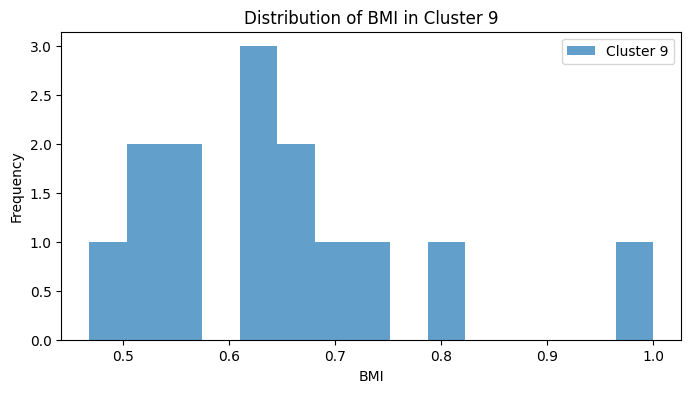

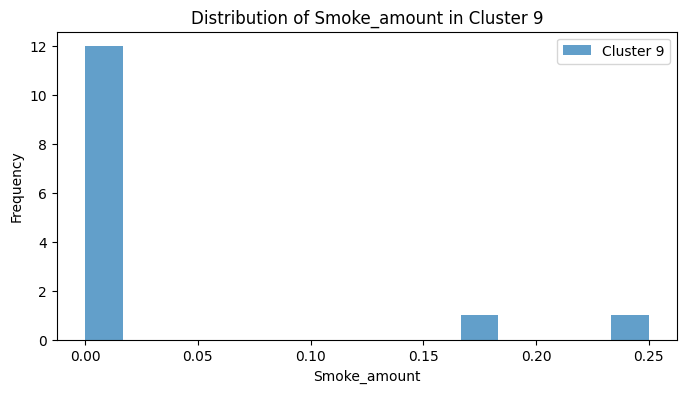

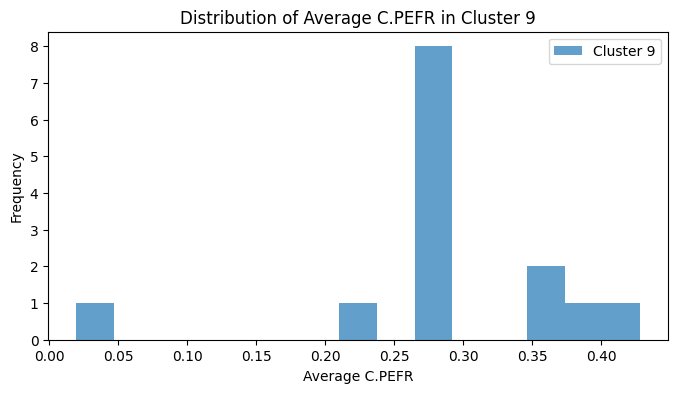

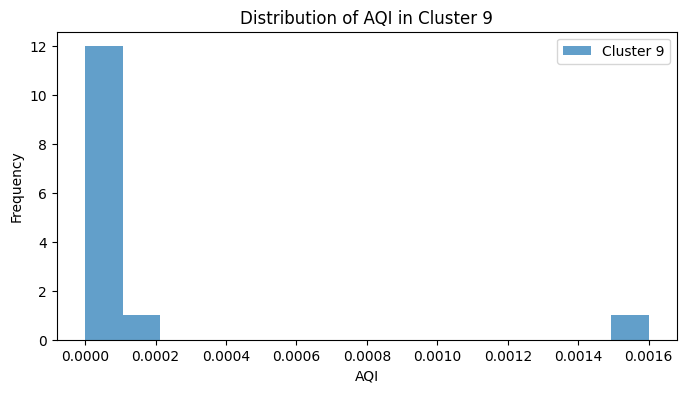

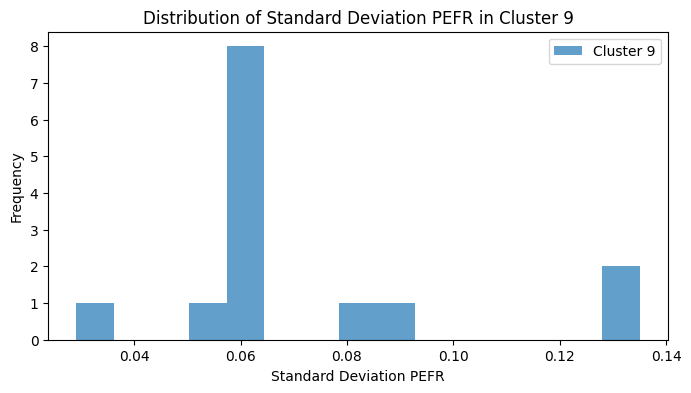

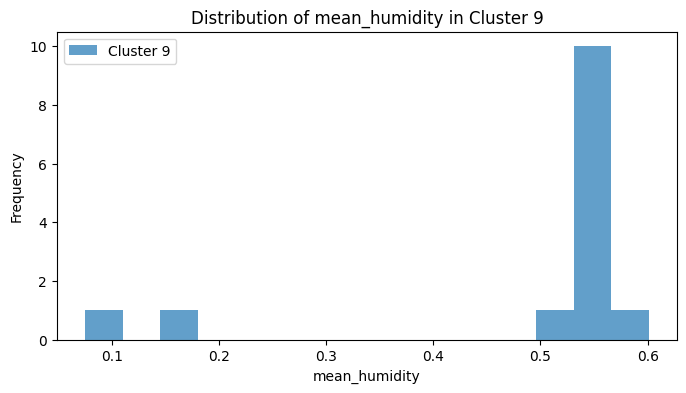

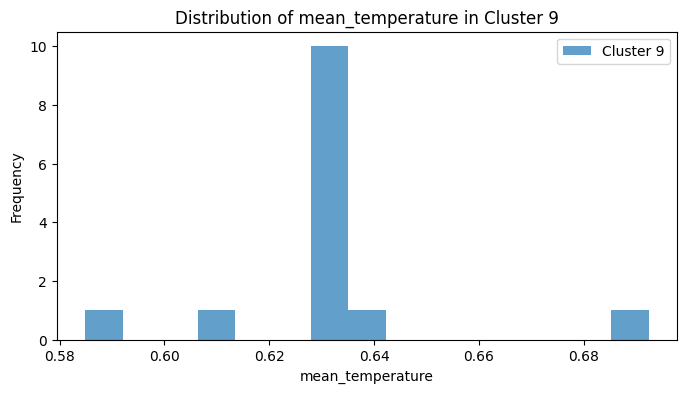

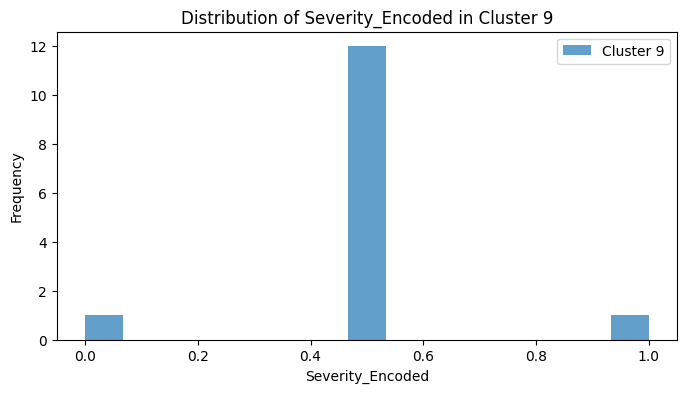

In [849]:
for feature in numeric_features:
        plt.figure(figsize=(8, 4))
        plt.hist(cluster_data[feature], bins=15, alpha=0.7, label=f"Cluster {cluster}")
        plt.title(f"Distribution of {feature} in Cluster {cluster}")
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

In [850]:
# Count the number of points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

print("Number of points in each cluster:")
print(cluster_counts)


Number of points in each cluster:
Cluster
0     1
1    28
2     2
3    14
4    15
5     1
6     1
7    20
8     6
9    14
Name: count, dtype: int64


In [851]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


In [852]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster'],
      dtype='object')

In [853]:
# Add Cluster column to the scaled dataframe for visualization
df_scaled_df = pd.DataFrame(df_scaled, columns=numeric_features)
df_scaled_df['Cluster'] = df['Cluster']


In [854]:
df_scaled_df.columns

Index(['Age', 'BMI', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity_Encoded', 'Cluster'],
      dtype='object')

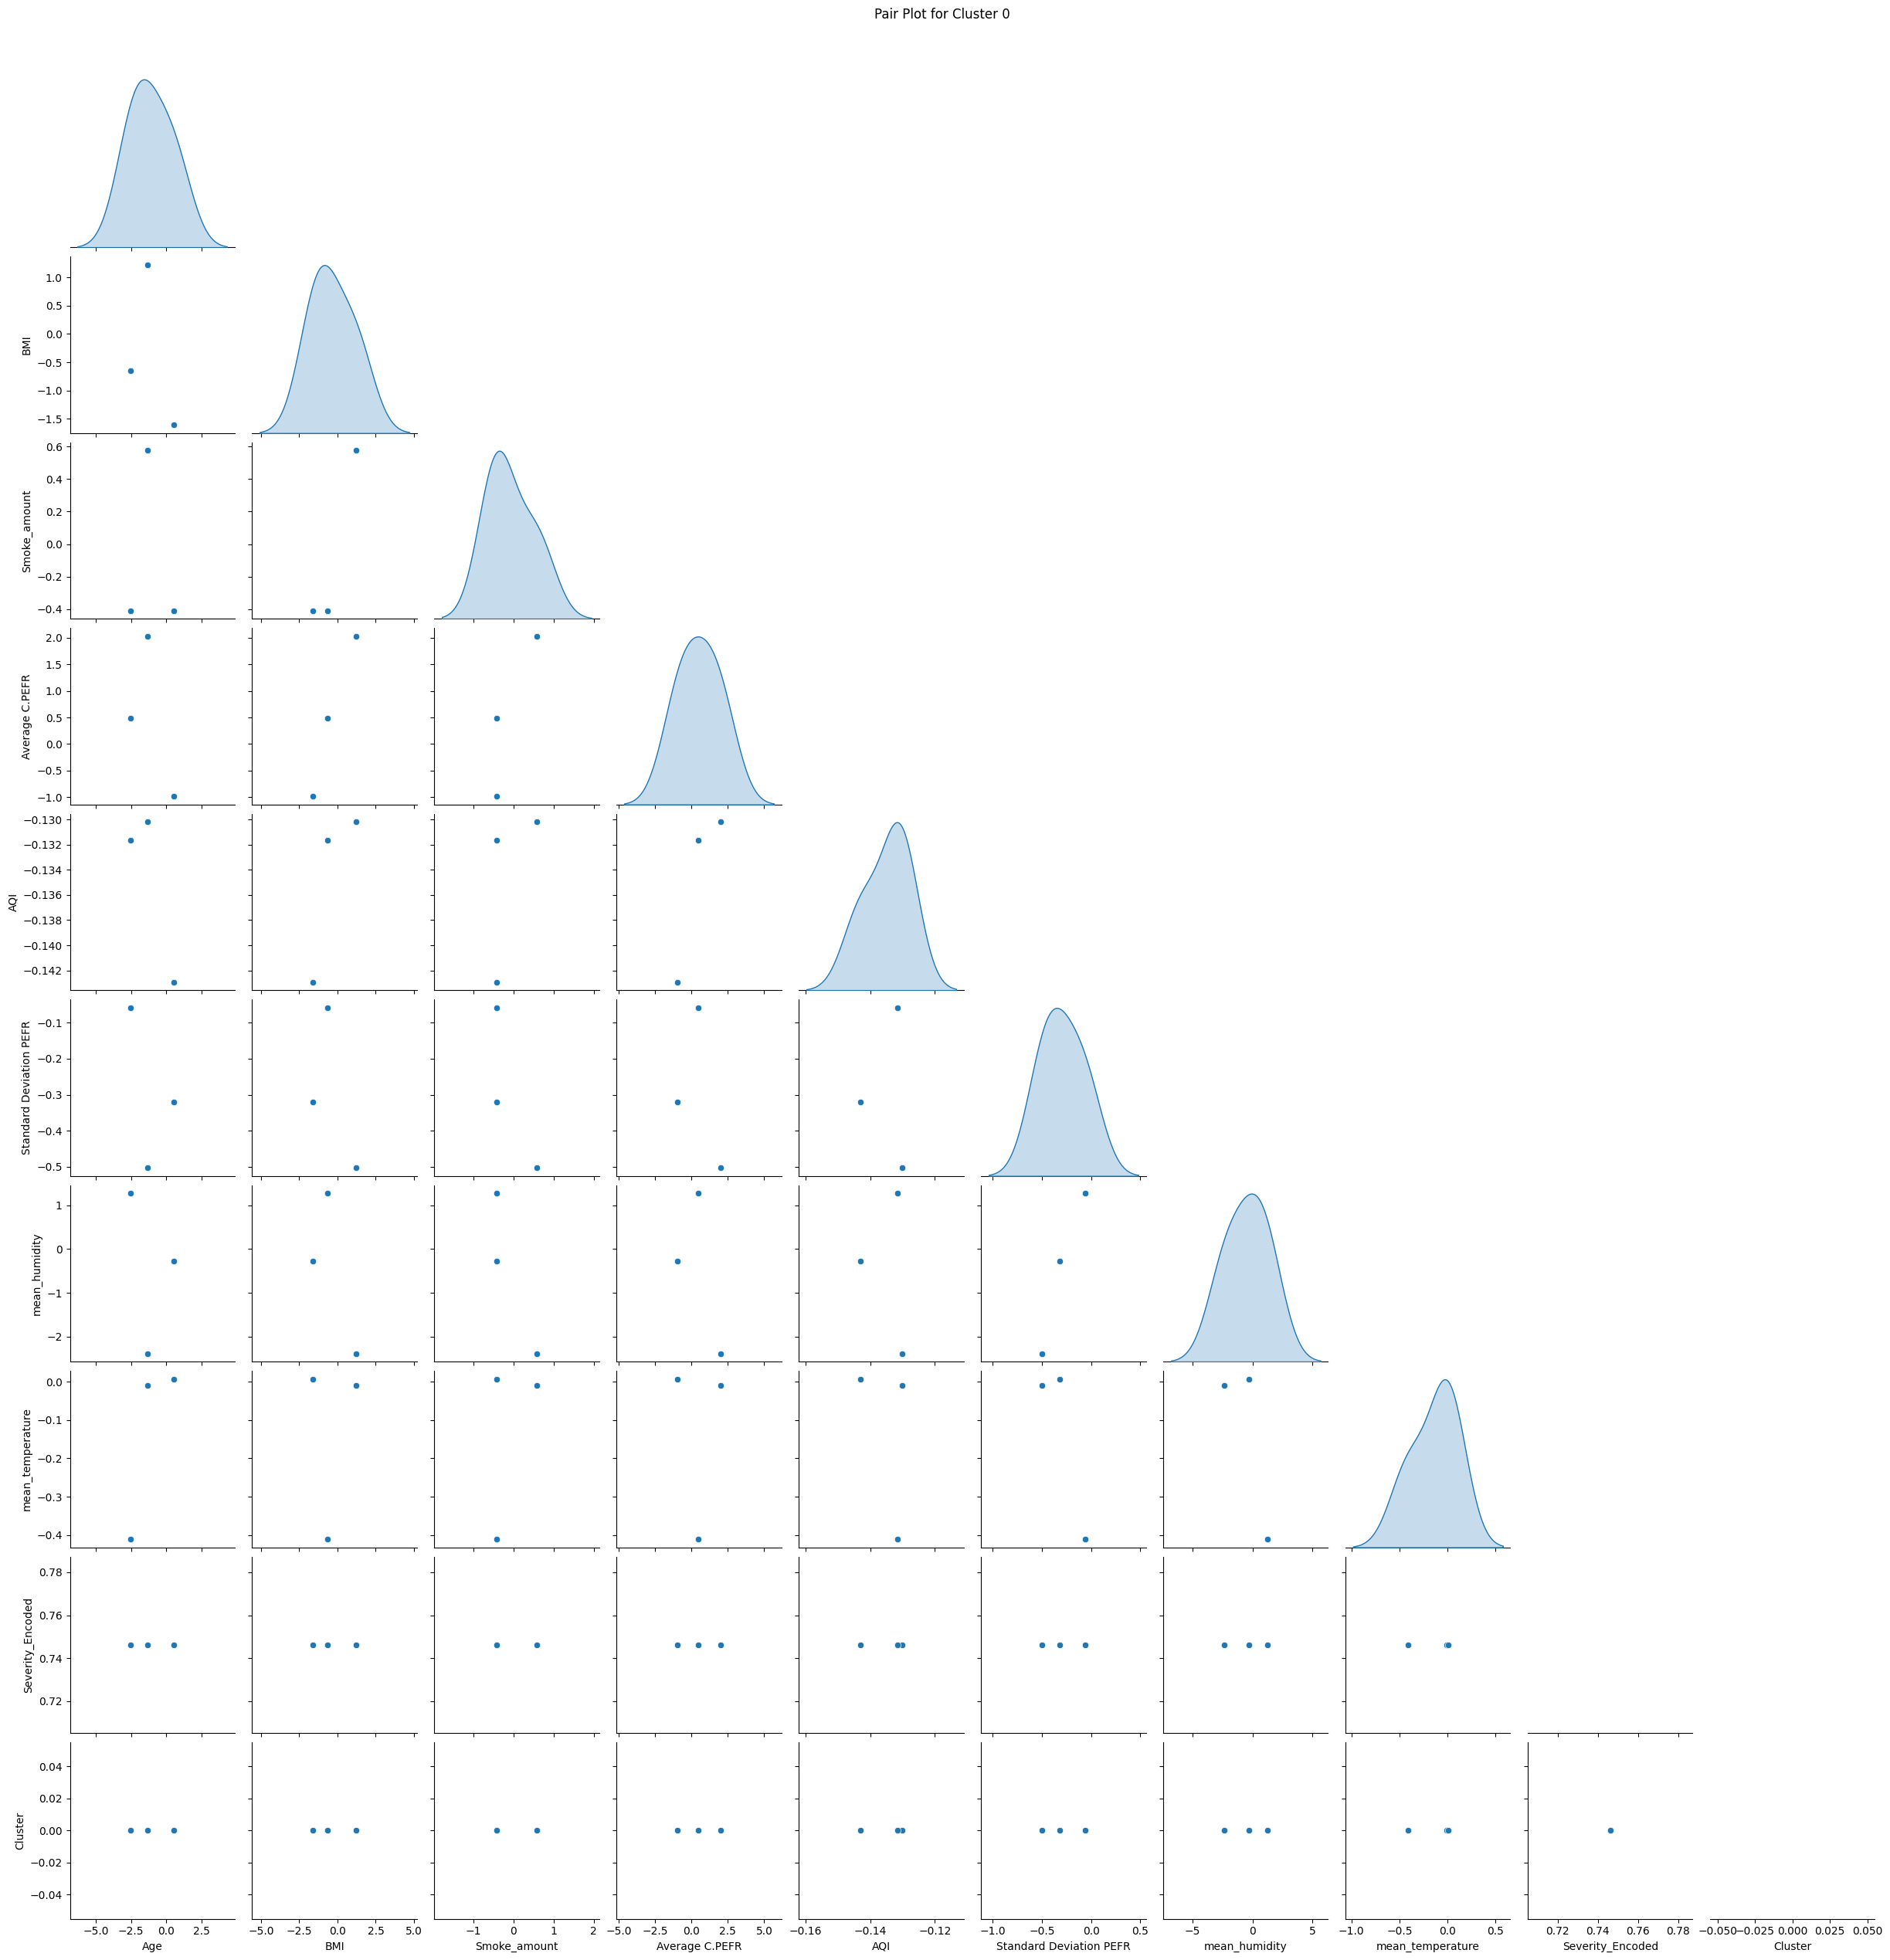

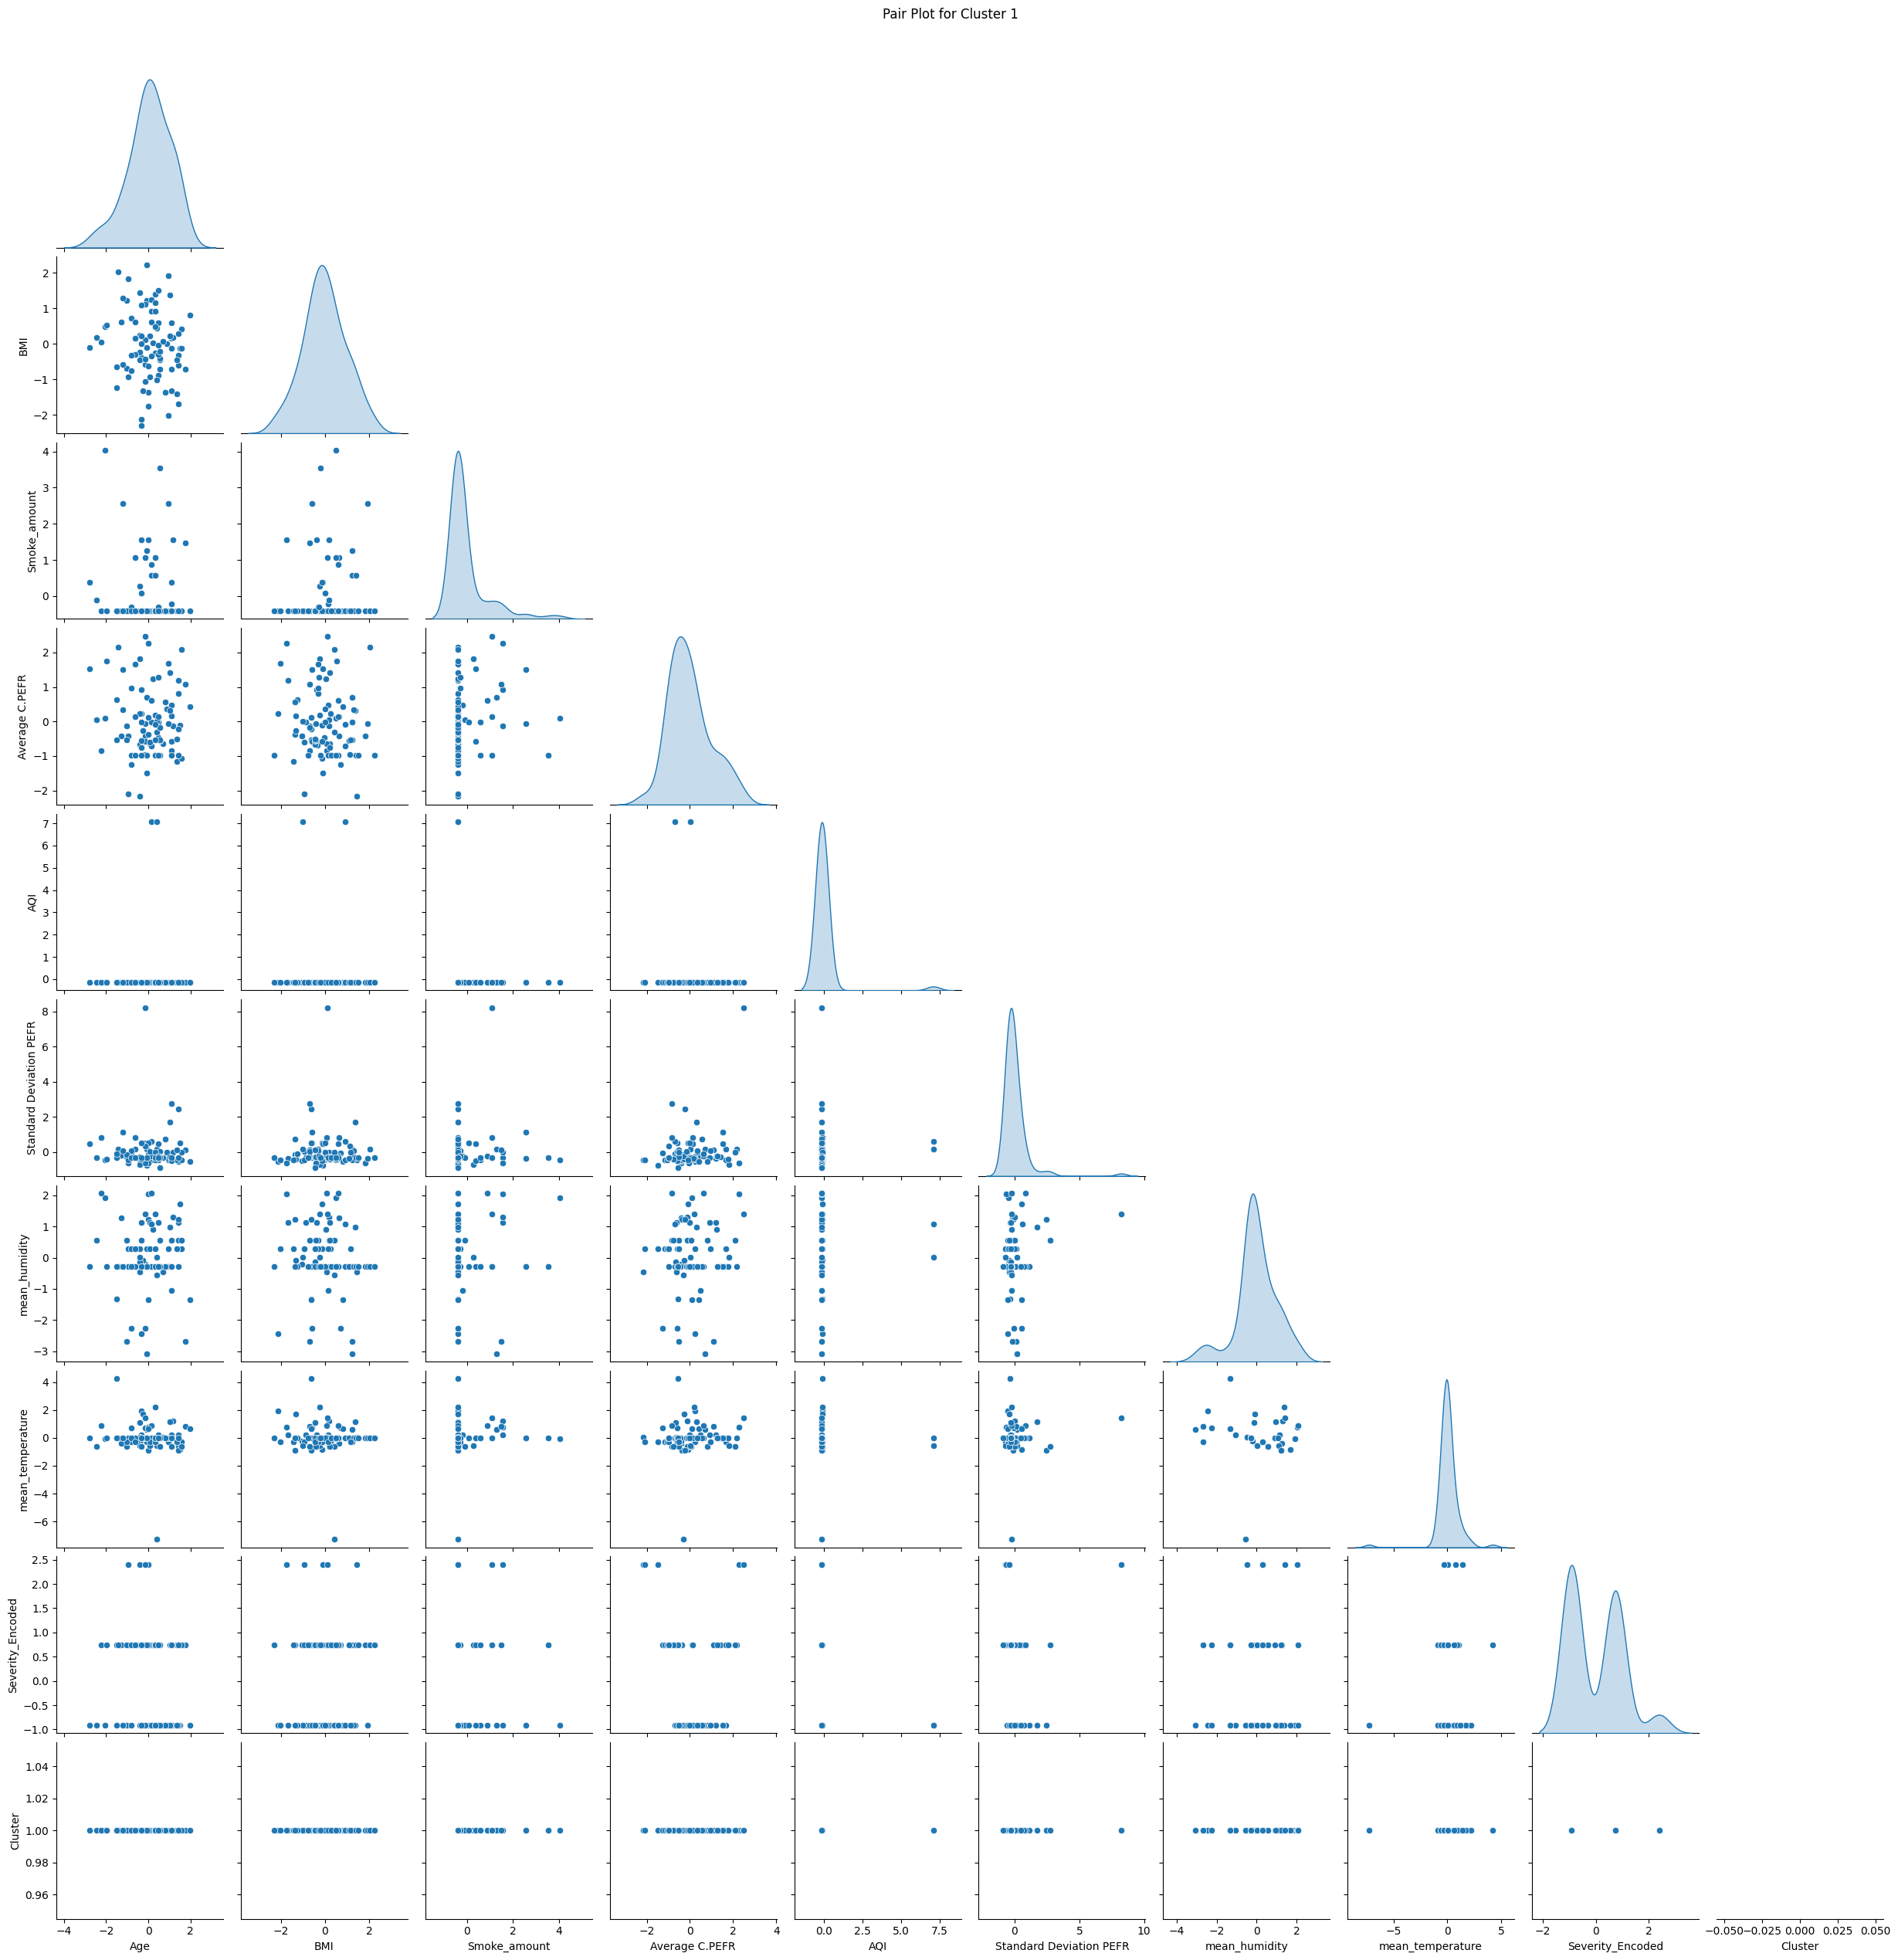

In [855]:
# Visualize each cluster with a pair plot
for cluster in range(optimal_clusters):
    cluster_data = df_scaled_df[df_scaled_df['Cluster'] == cluster]
    sns.pairplot(cluster_data, diag_kind='kde', corner=True)
    plt.suptitle(f'Pair Plot for Cluster {cluster}', y=1.02)
    plt.show()

In [856]:
# Initialize a dictionary to store results
cluster_results = {}

In [857]:
# Loop through each cluster
for cluster in range(optimal_clusters):
    print(f"\nProcessing Cluster {cluster}")

    # Select data for the current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Define features (X) and target (y)
    X = cluster_data[numeric_features[:-1]]  # Exclude 'Severity_Encoded' or other target column
    y = cluster_data['Severity_Encoded']  # Change target column if needed

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    cluster_results[cluster] = {
        "model": model,
        "mse": mse,
        "r2": r2
    }




Processing Cluster 0

Processing Cluster 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [858]:
print(f"Cluster {cluster}: MSE = {mse:.2f}, R² = {r2:.2f}")


Cluster 1: MSE = 0.09, R² = 0.01


In [859]:
# Initialize the range of clusters we want to analyze
specific_k_values = [2, 3]
cluster_results = {}

In [860]:
for k in specific_k_values:
    print(f"Running KMeans for k = {k}")

    # Initialize KMeans for current k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model
    kmeans.fit(df_scaled)

    # Assign the cluster labels to the dataframe
    df[f'Cluster_k{k}'] = kmeans.labels_

    # Store the inertia for each k
    cluster_results[k] = {
        "inertia": kmeans.inertia_,
        "centroids": kmeans.cluster_centers_
    }

Running KMeans for k = 2
Running KMeans for k = 3


In [861]:
print(f"Inertia for k = {k}: {kmeans.inertia_}")

Inertia for k = 3: 765.6002776405014


In [862]:
# Perform KMeans for k = 2 and k = 3
specific_k_values = [2, 3]
cluster_details = {}
for k in specific_k_values:
    print(f"\nRunning KMeans for k = {k}")

    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_k{k}'] = kmeans.fit_predict(df_scaled)

    # Store cluster details
    cluster_details[k] = {
        "labels": kmeans.labels_,
        "centroids": kmeans.cluster_centers_
    }


Running KMeans for k = 2

Running KMeans for k = 3


In [863]:
for k in specific_k_values:
    print(f"\nRunning KMeans for k = {k}")

    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_k{k}'] = kmeans.fit_predict(df_scaled)

    # Store cluster details
    cluster_details[k] = {
        "labels": kmeans.labels_,
        "centroids": kmeans.cluster_centers_
    }

    # Print cluster information
    print(f"\nCluster details for k = {k}:")
    for cluster_id in range(k):
        cluster_points = df[df[f'Cluster_k{k}'] == cluster_id]
        print(f"\nCluster {cluster_id}:")
        print(f"Number of Points: {len(cluster_points)}")
        print("Points in Cluster:")
        print(cluster_points)


Running KMeans for k = 2

Cluster details for k = 2:

Cluster 0:
Number of Points: 3
Points in Cluster:
         Age       BMI  Sex  Smoke_amount  Average C.PEFR           AQI  \
41  0.583333  0.098736    0      0.333333        0.954497  2.000200e-07   
62  0.550000  0.434861    0      0.250000        1.000000  1.700170e-05   
90  0.716667  0.492268    0      1.000000        0.882718  1.600160e-03   

    Standard Deviation PEFR  mean_humidity  mean_temperature  Severity  \
41                 0.030025       0.994928          0.696970      High   
62                 1.000000       0.871513          0.757576      High   
90                 0.052672       0.542688          0.633333  Moderate   

        ID  Severity_Encoded  GMM_Cluster  DBSCAN_Cluster  Cluster  \
41  SB-048               1.0            0              -1        0   
62  SB-070               1.0            0              -1        0   
90  SB-111               0.5            0              -1        0   

    Cluster_k2  

In [864]:
# Save the clustered dataset as a CSV file
output_filename = "clustered_dataset.csv"
df.to_csv(output_filename, index=False)
print(f"\nClustered dataset saved as {output_filename}")


Clustered dataset saved as clustered_dataset.csv


In [865]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [866]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster', 'Cluster_k2', 'Cluster_k3'],
      dtype='object')

In [867]:
# Add PCA results to the dataframe
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

In [868]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster', 'Cluster_k2', 'Cluster_k3', 'PCA1', 'PCA2'],
      dtype='object')

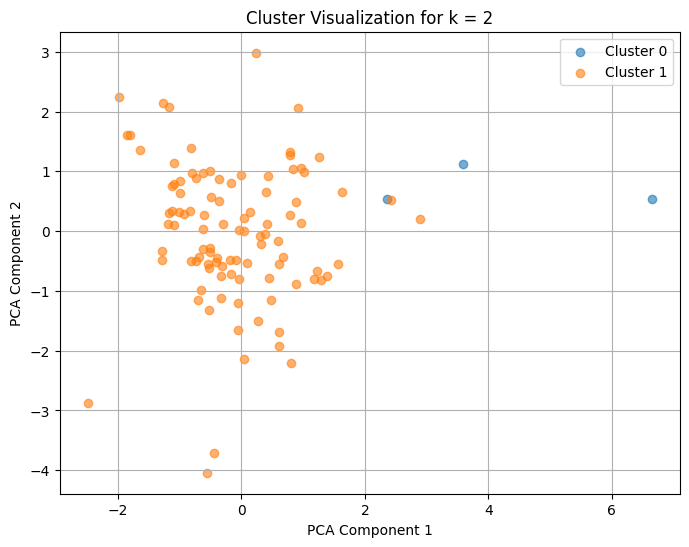

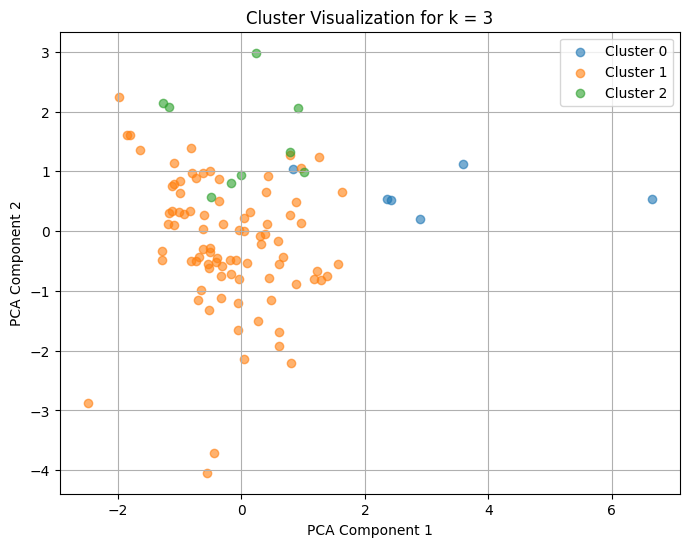

In [869]:
# Plot clusters for k = 2 and k = 3
for k in [2, 3]:
    plt.figure(figsize=(8, 6))
    for cluster_id in range(k):
        cluster_data = df[df[f'Cluster_k{k}'] == cluster_id]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}', alpha=0.6)

    plt.title(f'Cluster Visualization for k = {k}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid()
    plt.show()

In [940]:
df=pd.read_csv('/content/clustered_dataset.csv')

In [941]:
df.head()

,Age,BMI,Sex,Smoke_amount,Average C.PEFR,AQI,Standard Deviation PEFR,mean_humidity,mean_temperature,Severity,ID,Severity_Encoded,GMM_Cluster,DBSCAN_Cluster,Cluster,Cluster_k2,Cluster_k3
0,0.600000,0.310917,1,0.000000,0.737290,2.000200e-07,0.232149,0.542688,0.633333,Low,SB-002,0.0,1,0,1,1,1
1,0.516667,0.345766,1,0.333333,0.671521,2.900290e-05,0.065343,0.818259,0.651515,Low,SB-003,0.0,1,-1,1,1,1
2,0.316667,0.527810,1,0.000000,0.388295,4.900490e-07,0.078270,0.845309,0.596970,Moderate,SB-004,0.5,1,1,1,1,1
3,0.383333,0.745250,1,0.000000,0.388295,2.000200e-07,0.029127,0.542688,0.633333,Moderate,SB-005,0.5,1,1,1,1,1
4,0.566667,0.637367,1,0.283333,0.626134,5.400540e-07,0.119394,0.000000,0.683333,Low,SB-006,0.0,2,-1,1,1,2


In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      102 non-null    float64
 1   BMI                      102 non-null    float64
 2   Sex                      102 non-null    int64  
 3   Smoke_amount             102 non-null    float64
 4   Average C.PEFR           102 non-null    float64
 5   AQI                      102 non-null    float64
 6   Standard Deviation PEFR  102 non-null    float64
 7   mean_humidity            102 non-null    float64
 8   mean_temperature         102 non-null    float64
 9   Severity                 102 non-null    object 
 10  ID                       102 non-null    object 
 11  Severity_Encoded         102 non-null    float64
 12  GMM_Cluster              102 non-null    int64  
 13  DBSCAN_Cluster           102 non-null    int64  
 14  Cluster                  1

In [943]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [944]:
df.head()

,Age,BMI,Sex,Smoke_amount,Average C.PEFR,AQI,Standard Deviation PEFR,mean_humidity,mean_temperature,Severity,ID,Severity_Encoded,GMM_Cluster,DBSCAN_Cluster,Cluster,Cluster_k2,Cluster_k3
0,0.600000,0.310917,1,0.000000,0.737290,2.000200e-07,0.232149,0.542688,0.633333,Low,SB-002,0.0,1,0,1,1,1
1,0.516667,0.345766,1,0.333333,0.671521,2.900290e-05,0.065343,0.818259,0.651515,Low,SB-003,0.0,1,-1,1,1,1
2,0.316667,0.527810,1,0.000000,0.388295,4.900490e-07,0.078270,0.845309,0.596970,Moderate,SB-004,0.5,1,1,1,1,1
3,0.383333,0.745250,1,0.000000,0.388295,2.000200e-07,0.029127,0.542688,0.633333,Moderate,SB-005,0.5,1,1,1,1,1
4,0.566667,0.637367,1,0.283333,0.626134,5.400540e-07,0.119394,0.000000,0.683333,Low,SB-006,0.0,2,-1,1,1,2


In [945]:
columns_to_encode = [col for col in df.columns if col != 'ID']

In [948]:
# Initialize a dictionary to store LabelEncoders
label_encoders = {}
# Apply LabelEncoder to each column in columns_to_encode
for col in columns_to_encode:
    if df[col].dtype == 'object':  # Apply encoding only for object (categorical) columns
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store the LabelEncoder for future use



In [949]:
df.head()

,Age,BMI,Sex,Smoke_amount,Average C.PEFR,AQI,Standard Deviation PEFR,mean_humidity,mean_temperature,Severity,ID,Severity_Encoded,GMM_Cluster,DBSCAN_Cluster,Cluster,Cluster_k2,Cluster_k3
0,0.600000,0.310917,1,0.000000,0.737290,2.000200e-07,0.232149,0.542688,0.633333,1,SB-002,0.0,1,0,1,1,1
1,0.516667,0.345766,1,0.333333,0.671521,2.900290e-05,0.065343,0.818259,0.651515,1,SB-003,0.0,1,-1,1,1,1
2,0.316667,0.527810,1,0.000000,0.388295,4.900490e-07,0.078270,0.845309,0.596970,2,SB-004,0.5,1,1,1,1,1
3,0.383333,0.745250,1,0.000000,0.388295,2.000200e-07,0.029127,0.542688,0.633333,2,SB-005,0.5,1,1,1,1,1
4,0.566667,0.637367,1,0.283333,0.626134,5.400540e-07,0.119394,0.000000,0.683333,1,SB-006,0.0,2,-1,1,1,2


In [950]:
# Standardize numerical columns for clustering
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = scaler.fit_transform(df[numeric_columns])


In [951]:
df.head()

,Age,BMI,Sex,Smoke_amount,Average C.PEFR,AQI,Standard Deviation PEFR,mean_humidity,mean_temperature,Severity,ID,Severity_Encoded,GMM_Cluster,DBSCAN_Cluster,Cluster,Cluster_k2,Cluster_k3
0,0.600000,0.310917,1,0.000000,0.737290,2.000200e-07,0.232149,0.542688,0.633333,1,SB-002,0.0,1,0,1,1,1
1,0.516667,0.345766,1,0.333333,0.671521,2.900290e-05,0.065343,0.818259,0.651515,1,SB-003,0.0,1,-1,1,1,1
2,0.316667,0.527810,1,0.000000,0.388295,4.900490e-07,0.078270,0.845309,0.596970,2,SB-004,0.5,1,1,1,1,1
3,0.383333,0.745250,1,0.000000,0.388295,2.000200e-07,0.029127,0.542688,0.633333,2,SB-005,0.5,1,1,1,1,1
4,0.566667,0.637367,1,0.283333,0.626134,5.400540e-07,0.119394,0.000000,0.683333,1,SB-006,0.0,2,-1,1,1,2


In [952]:
# Assuming 'ID' is in the original dataset
features = ['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
            'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature', 'Severity']
selected_features = features.copy()  # Keeping a copy of selected features


# Step 1: Select the relevant features and create a copy
df_selected = df[features].copy()

# Step 2: Standardize the data (excluding 'ID' column)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected[selected_features])


# Step 4: Fit KMeans with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
final_data['Cluster_2'] = kmeans_2.fit_predict(X_scaled)

# Step 5: Retrieve cluster centers
cluster_centers_scaled_2 = kmeans_2.cluster_centers_

# Step 6: Inverse transform the scaled centers to original scale
cluster_centers_2 = scaler.inverse_transform(cluster_centers_scaled_2)

# Step 7: Create a DataFrame for better visualization of the clusters
cluster_centers_df_2 = pd.DataFrame(cluster_centers_2, columns=selected_features, index=['Cluster 0', 'Cluster 1'])

# Display the cluster centers
print("Cluster Centers (k=2):")
print(cluster_centers_df_2)


Cluster Centers (k=2):
                Age       BMI       Sex  Smoke_amount  Average C.PEFR  \
Cluster 0  0.525758  0.426351  0.272727      0.456061        0.672945   
Cluster 1  0.591941  0.414022  0.395604      0.022527        0.454718   

                AQI  Standard Deviation PEFR  mean_humidity  mean_temperature  \
Cluster 0  0.000323                  0.16992       0.747330          0.668182   
Cluster 1  0.022207                  0.09000       0.579993          0.628405   

           Severity  
Cluster 0  1.000000  
Cluster 1  1.417582  


In [922]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster', 'Cluster_k2', 'Cluster_k3'],
      dtype='object')

In [953]:
df.head()

,Age,BMI,Sex,Smoke_amount,Average C.PEFR,AQI,Standard Deviation PEFR,mean_humidity,mean_temperature,Severity,ID,Severity_Encoded,GMM_Cluster,DBSCAN_Cluster,Cluster,Cluster_k2,Cluster_k3
0,0.600000,0.310917,1,0.000000,0.737290,2.000200e-07,0.232149,0.542688,0.633333,1,SB-002,0.0,1,0,1,1,1
1,0.516667,0.345766,1,0.333333,0.671521,2.900290e-05,0.065343,0.818259,0.651515,1,SB-003,0.0,1,-1,1,1,1
2,0.316667,0.527810,1,0.000000,0.388295,4.900490e-07,0.078270,0.845309,0.596970,2,SB-004,0.5,1,1,1,1,1
3,0.383333,0.745250,1,0.000000,0.388295,2.000200e-07,0.029127,0.542688,0.633333,2,SB-005,0.5,1,1,1,1,1
4,0.566667,0.637367,1,0.283333,0.626134,5.400540e-07,0.119394,0.000000,0.683333,1,SB-006,0.0,2,-1,1,1,2


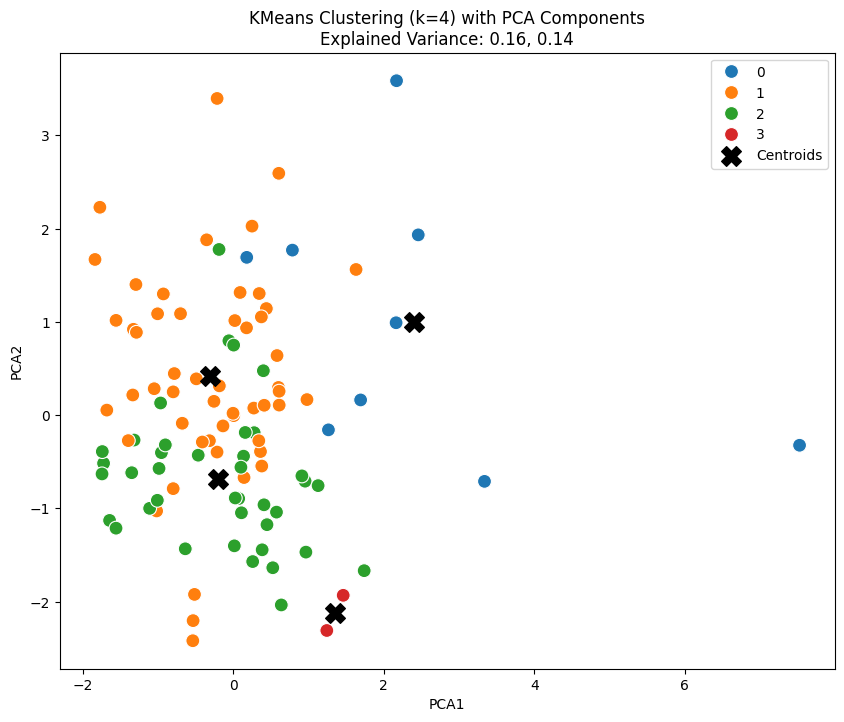

In [954]:


# Assuming X_scaled is preprocessed and corresponds to final_data_cluster
# final_data_cluster must have the same length as X_scaled

def visualize_kmeans(k):
    # Check if the lengths of X_scaled and final_data_cluster match
    if len(X_scaled) != len(final_data_cluster):
        raise ValueError("Length of X_scaled does not match final_data_cluster. Ensure consistency.")

    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    final_data_cluster[f'Cluster_{k}'] = kmeans.fit_predict(X_scaled)

    # Use PCA for 2D visualization
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_

    # Create a DataFrame for the PCA components
    pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = final_data_cluster[f'Cluster_{k}']

    # Plot the PCA components with cluster labels
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='tab10', s=100)

    # Transform the cluster centers into the PCA space
    cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

    # Add cluster centroids
    plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=200, c='black', marker='X', label='Centroids')

    plt.title(f'KMeans Clustering (k={k}) with PCA Components\nExplained Variance: {explained_variance[0]:.2f}, {explained_variance[1]:.2f}')
    plt.legend()
    plt.show()

# Ensure final_data_cluster matches X_scaled in size
final_data_cluster = pd.DataFrame(index=range(len(X_scaled)))  # Reset index and match rows

# Visualize clusters for a given k
visualize_kmeans(4)


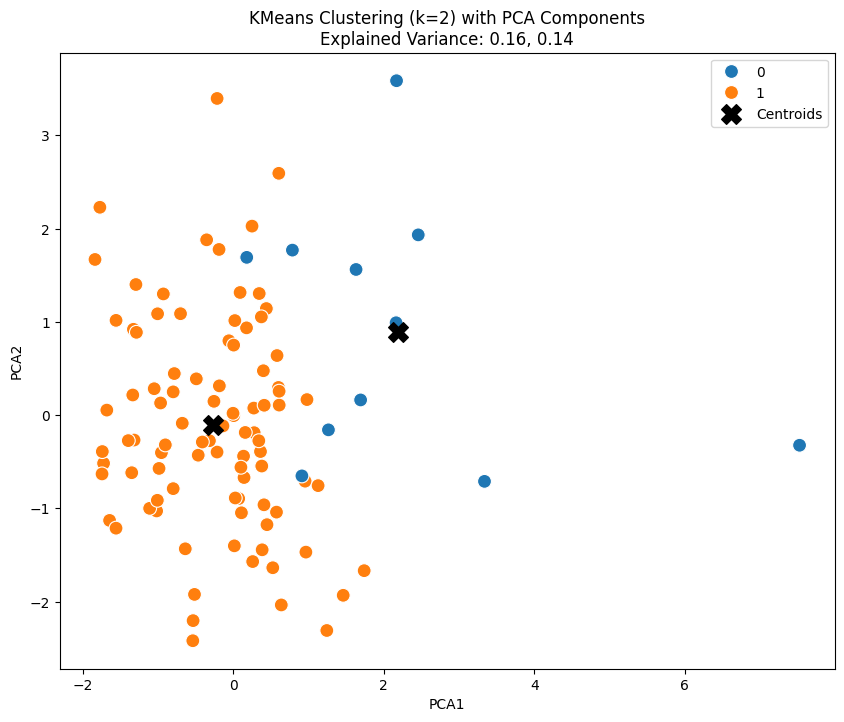

In [955]:
visualize_kmeans(2)

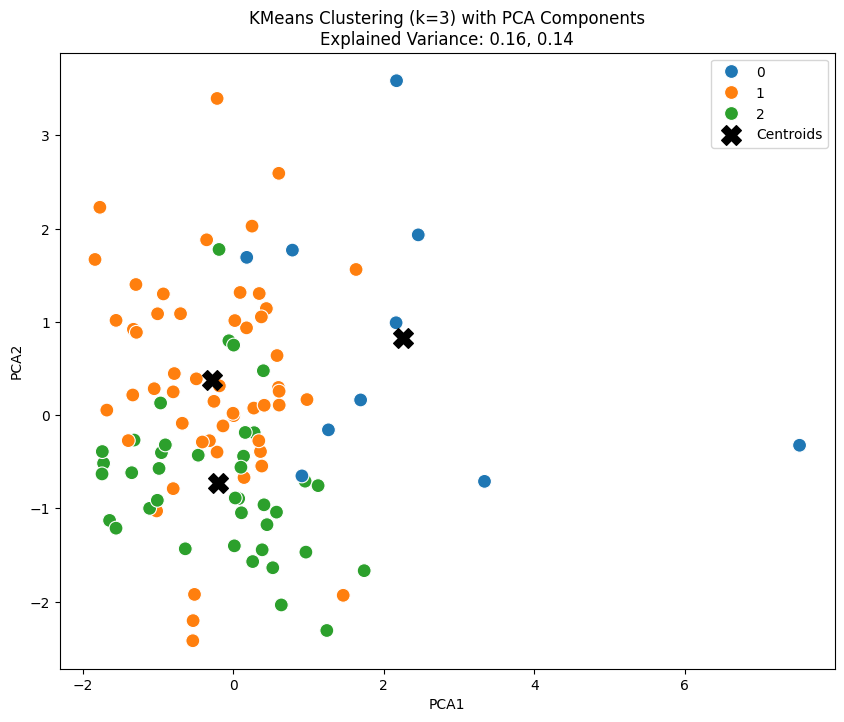

In [956]:
visualize_kmeans(3)

In [957]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster', 'Cluster_k2', 'Cluster_k3'],
      dtype='object')

In [958]:
df.head()

,Age,BMI,Sex,Smoke_amount,Average C.PEFR,AQI,Standard Deviation PEFR,mean_humidity,mean_temperature,Severity,ID,Severity_Encoded,GMM_Cluster,DBSCAN_Cluster,Cluster,Cluster_k2,Cluster_k3
0,0.600000,0.310917,1,0.000000,0.737290,2.000200e-07,0.232149,0.542688,0.633333,1,SB-002,0.0,1,0,1,1,1
1,0.516667,0.345766,1,0.333333,0.671521,2.900290e-05,0.065343,0.818259,0.651515,1,SB-003,0.0,1,-1,1,1,1
2,0.316667,0.527810,1,0.000000,0.388295,4.900490e-07,0.078270,0.845309,0.596970,2,SB-004,0.5,1,1,1,1,1
3,0.383333,0.745250,1,0.000000,0.388295,2.000200e-07,0.029127,0.542688,0.633333,2,SB-005,0.5,1,1,1,1,1
4,0.566667,0.637367,1,0.283333,0.626134,5.400540e-07,0.119394,0.000000,0.683333,1,SB-006,0.0,2,-1,1,1,2


In [959]:
features = ['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
            'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature', 'Severity']
df = df[features].copy()

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Ensure final_data has the same index and length as X_scaled
final_data = df.reset_index(drop=True)

# Step 3: Fit KMeans with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
final_data['Cluster_2'] = kmeans_2.fit_predict(X_scaled)

# Step 4: Retrieve cluster centers
cluster_centers_scaled_2 = kmeans_2.cluster_centers_

# Step 5: Inverse transform the scaled centers to original scale
cluster_centers_2 = scaler.inverse_transform(cluster_centers_scaled_2)

# Step 6: Create a DataFrame for better visualization of the clusters
cluster_centers_df_2 = pd.DataFrame(cluster_centers_2, columns=features, index=['Cluster 0', 'Cluster 1'])
print("Cluster Centers (k=2):")
print(cluster_centers_df_2)

Cluster Centers (k=2):
                Age       BMI       Sex  Smoke_amount  Average C.PEFR  \
Cluster 0  0.525758  0.426351  0.272727      0.456061        0.672945   
Cluster 1  0.591941  0.414022  0.395604      0.022527        0.454718   

                AQI  Standard Deviation PEFR  mean_humidity  mean_temperature  \
Cluster 0  0.000323                  0.16992       0.747330          0.668182   
Cluster 1  0.022207                  0.09000       0.579993          0.628405   

           Severity  
Cluster 0  1.000000  
Cluster 1  1.417582  


In [ ]:
final_data=pd.read_csv('/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/Final preprocessed data.csv')

In [ ]:
# Step 2: Ensure final_data includes 'ID' and has the same index as X_scaled
final_data = df_selected[['ID']].reset_index(drop=True)

In [ ]:
#  Fit KMeans with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
final_data['Cluster_2'] = kmeans_2.fit_predict(X_scaled)

#Retrieve cluster centers
cluster_centers_scaled_2 = kmeans_2.cluster_centers_

# Inverse transform the scaled centers to the original scale
cluster_centers_2 = scaler.inverse_transform(cluster_centers_scaled_2)

# Create a DataFrame for better visualization of the clusters
cluster_centers_df_2 = pd.DataFrame(cluster_centers_2, columns=selected_features, index=['Cluster 0', 'Cluster 1'])

# Display the cluster centers
print("Cluster Centers (k=2):")
print(cluster_centers_df_2)

Cluster Centers (k=2):
                Age       BMI       Sex  Smoke_amount  Average C.PEFR  \
Cluster 0  0.525758  0.426351  0.272727      0.456061        0.672945   
Cluster 1  0.591941  0.414022  0.395604      0.022527        0.454718   

                AQI  Standard Deviation PEFR  mean_humidity  mean_temperature  \
Cluster 0  0.000323                  0.16992       0.747330          0.668182   
Cluster 1  0.022207                  0.09000       0.579993          0.628405   

           Severity  
Cluster 0  1.000000  
Cluster 1  1.417582  


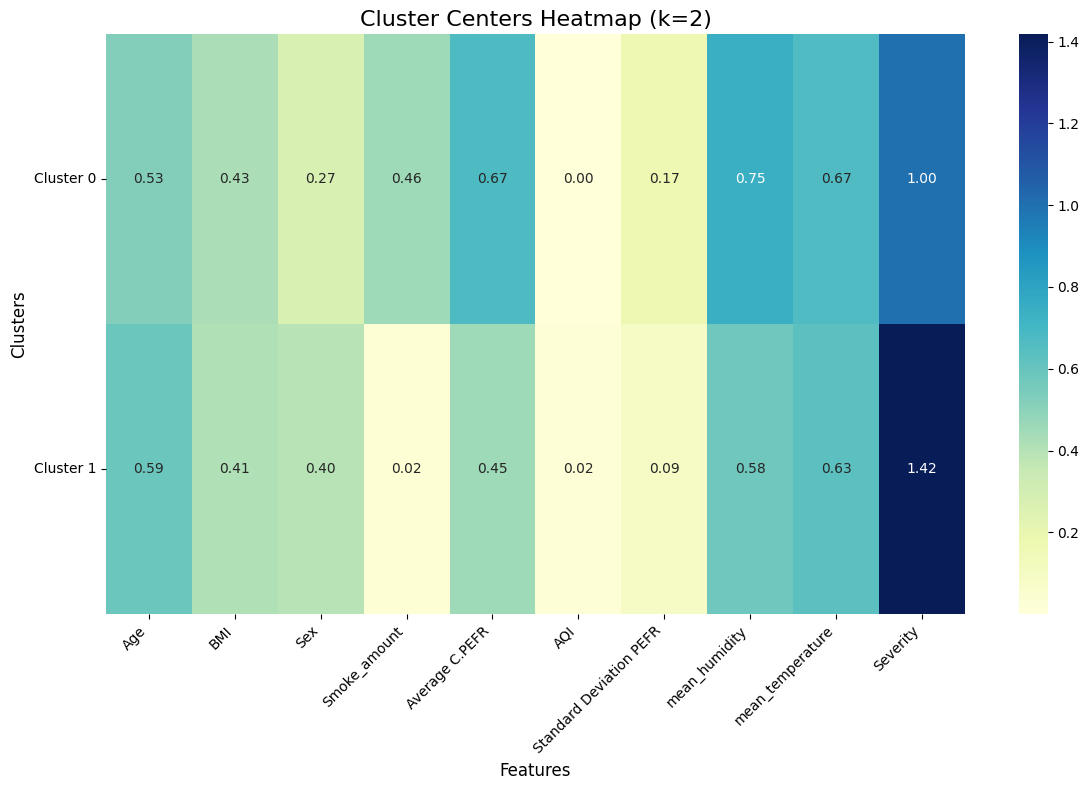

In [964]:
# Step 7: Create a heatmap for cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers_df_2, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Cluster Centers Heatmap (k=2)", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Smoke_amount', 'Average C.PEFR', 'AQI',
       'Standard Deviation PEFR', 'mean_humidity', 'mean_temperature',
       'Severity', 'ID', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster',
       'Cluster', 'Cluster_k2', 'Cluster_k3'],
      dtype='object')

In [968]:
import pandas as pd

# Load the datasets
dataset2 = pd.read_csv("/content/clustered_dataset.csv")  # Replace with the actual file name
dataset1 = pd.read_csv("/content/drive/My Drive/Patient data individual/2024-Data/CSV_Files/Final preprocessed data.csv")  # Replace with the actual file name

# Ensure both datasets have the 'ID' column
if 'ID' in dataset1.columns and 'ID' in dataset2.columns:
    # Find the common IDs between the two datasets
    common_ids = pd.merge(dataset1[['ID']], dataset2[['ID']], on='ID', how='inner')

    # Filter rows with common IDs in dataset2 and select the specified columns
    selected_columns = ['ID','Severity', 'Severity_Encoded', 'GMM_Cluster', 'DBSCAN_Cluster', 'Cluster', 'Cluster_k2', 'Cluster_k3']
    matching_rows = dataset2[dataset2['ID'].isin(common_ids['ID'])][selected_columns]

    # Create the final_processed_data DataFrame using the matching rows
    final_processed_data = pd.merge(dataset1, matching_rows, on='ID', how='left')

    # Save the resulting dataset
    final_processed_data.to_csv("final_processed_data.csv", index=False)
    print("New dataset 'final_processed_data.csv' created and saved.")
else:
    print("The 'ID' column is missing in one or both datasets.")


New dataset 'final_processed_data.csv' created and saved.
